# Loan Repayment Classification

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv("data/loan_repayment.csv")
df.head()

,initial payment,last payment,credit score,house number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial payment  1000 non-null   int64 
 1   last payment     1000 non-null   int64 
 2   credit score     1000 non-null   int64 
 3   house number     1000 non-null   int64 
 4   sum              1000 non-null   int64 
 5   result           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


## Distribution of labels

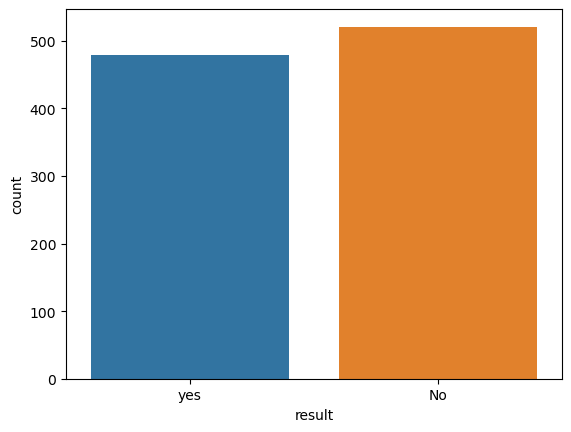

In [4]:
sns.countplot(data=df, x="result");

## Matrix of features and labels

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (1000, 5)
y (1000,)


## Splitting the dataset to training set and testing set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (800, 5)
X_test (200, 5)
y_train (800,)
y_test (200,)


## Create the classification model

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

## Predicting the test dataset

In [8]:
y_pred = tree_clf.predict(X_test)
y_pred

array(['No', 'No', 'No', 'No', 'yes', 'No', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'No', 'No', 'No', 'No', 'yes', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'yes',
       'yes', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'No', 'No', 'No', 'No', 'yes', 'No', 'yes',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'No', 'yes', 'yes',
       'yes', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'No', 'No', 'No', 'No', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'No',
       'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No', 'No',
       'No', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'yes', 'yes',

## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       109
         yes       1.00      1.00      1.00        91

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



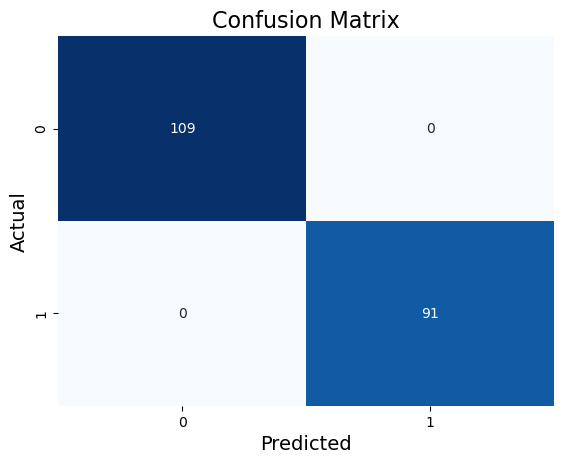

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=16);